# Week 2: Linear Regression and Linear Classifiers

In [2]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

## 2.2 Polynomial Regression and Other Feature Transformations

The function `linearr` allows one to perform polynomial regression, i.e. fitting a polynomial of some maximal degree in a least squares sense.
We use `scatterr` to scatter regression data.

Let's start with 1D data where polynomial `y = x^2 + eps` where `eps` is noise drawn from std normal distribution.

**NOTE: y is not linear in x, but linear in the estimated params w from the data!**

1000 by 1 prdataset with continuous targets.
Ordinary least squares, 1 to 1 trained mapping


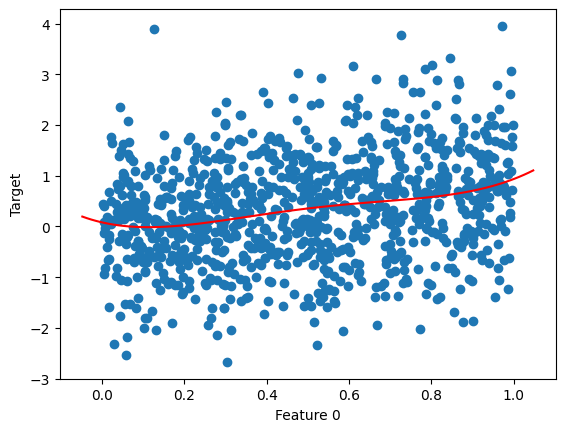

In [3]:
# Generate (1000 x 2) data where inputs are drawn uniformly from [0, 1]
train_size = 1000
x = np.random.rand(train_size, 1)
# Generate eps value (Gaussian noise) from a std normal distribution, for each x separately
y = x*x + np.random.randn(train_size, 1)       # Outputs y (1000 x 2 shape) 
# print('Labels: ', labels)
data = pr.gendatr(x, y)
print(data)
pr.scatterr(data)
# pr.scatterd(data)

# Use linearr to fit a linear model to the data
# Study the behavior of polynomials of degree 0 to 3 for different training set sizes (4, 40, 400)
# You can also estimate the squared error using a somewhat larger test set
R = pr.linearr(data, 4)
print(R)
pr.plotr(R, color='r')


Below we study a 2D regression problem with polynomial `y = 50 * sin(x1)sin(x2) + eps`.

(1000,)
Ordinary least squares, 2 to 1 trained mapping
Error:  2.4912043498185683e-31


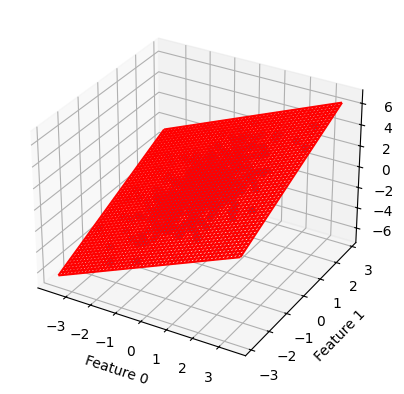

In [48]:
# Generate input in 2D (1000 x 2) and output (1000 x 1), where x is from std normal
train_size = 1000
x = np.random.randn(train_size, 2)

# NOTE: the first 2 y functions are non-linear, so linear regression will not work well!
# Linearr does not take into account cross terms, i.e. x1, x2...
y = 50 * np.sin(x[:, 0].reshape(-1, 1)) * np.sin(x[:, 1].reshape(-1, 1)) + np.random.randn(train_size, 1)
# y = x[:, 0] * x[:, 1]
# y = x[:, 0] + x[:, 1]

# Split dataset into training and test set 50/50
[train_x, test_x] = np.split(x, 2)
[train_y, test_y] = np.split(y, 2)
train_data = pr.gendatr(train_x, train_y)  # Training regression dataset with x and y values
pr.scatterr(train_data)

# TODO: Use linearr to fit a linear model to the data and have a look at the data from diff points of view by running .py in terminal
R = pr.linearr(train_data, 2)   # 2nd param is maximal polynomial degree
print(R)
pr.plotr(R, color='r', gridsize=50)

# TODO: Measure error on separate test set for different polynoamial degrees -> error does not change much!
test_data = pr.gendatr(test_x, test_y)
err = pr.testr(test_data, R, 'mse')
print('Error: ', err)

# Using y = 50 * sin(x1) * sin(x2) + eps we get these errors:
# Degree 1:  471.988
# Degree 2:  459.68
# Degree 3:  519.067

# Using y = x1 * x2 we get these errors:
# Degree 1:  0.958
# Degree 2:  1.06753  <-- NOTE: higher error, because y is degree 2!
# Degree 3:  1.02845

# NOTE: for  a linear function (i.e. degree 1) y = x1 + x2 the error is almost 0!

## 2.7 The Perceptron

Below we will generate a linearly separable dataset, from which we extact the feature matrix X and label vector.

In [5]:
def perceptron(data, num_iter):

    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero and additional one for bias w0
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)                # NOTE: add bias to x! 0 is the index, 1 is the value
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            # delta = (label.item(0,0) - target)  # TODO: Use this for data loaded into np matrix using pandas (Iris)
            delta = (label - target)              # TODO: Use this for regular np arrays
            
            if(delta): # misclassified count
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)   # Append number of misclassified samples for each epoch
    return (w, misclassified_)        

Below we use prtools to generate a linearly separable dataset.

Simple dataset 100 by 2 prdataset with 2 classes: [50 50]
Labels:  (100, 1)
Features:  (100, 2)
Data:  <class 'numpy.ndarray'>


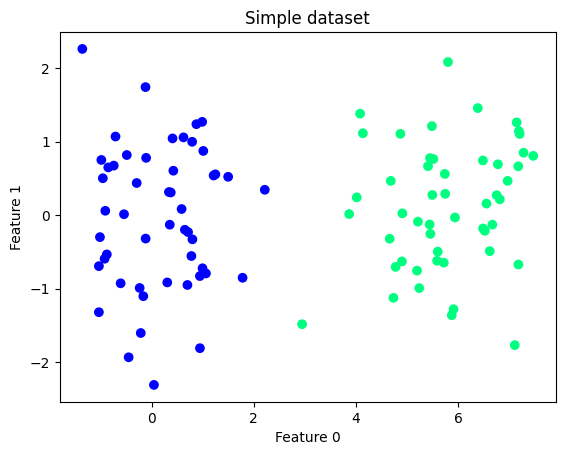

In [6]:
data = pr.gendats([50, 50], 2, 6)  # Generate 2D data with 2 classes, 2 features and delta = 6 (shift of mean for class 1, needed to make data separable)
print(data)
pr.scatterd(data)

# Extract feature matrix and labels
X = data.data
Y = data.nlab()
print('Labels: ', Y.shape)
print('Features: ', X.shape)

# Turn into numpy matrix with labels as last column to pass to perceptron
data_arr = np.hstack((X, Y))
print('Data: ', type(data_arr))

Train the perceptron on dataset we created.

In [45]:
num_iter = 10
w, misclassified_ = perceptron(data_arr, num_iter)
print('Final weights: ', w)    # [w0, w1, w2ﬁ]
print('No. of misclassified samples per epoch: ', misclassified_)

Final weights:  [[-3.          1.52307564  0.8174846 ]]
No. of misclassified samples per epoch:  [1, 3, 1, 0, 0, 0, 0, 0, 0, 0]


Plot decision boundary (where `w*x = 0`) -> does the weight vector separate the classes? it should!

In [7]:

# TODO: Plot the normal vector w by taking the separate weights w1 and w2 from the weight vector w
# Weight vector is perpendicular to the decision boundary!

def plot_decision_boundary(inputs, targets, weights):
    # fig config
    plt.figure(figsize=(5,3))
    plt.grid(True)

    # Plot input samples (2D data points)
    # Two classes: red color for +1 and blue color for -1
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Calculating slope and intercept with given three weights
    # The x-value in y = ax + b is any point on x-axis between xmin and xmax of the data
    for i in np.linspace(np.amin(inputs[:,:1]), np.amax(inputs[:,:1])): 
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]
        y = (slope * i) + intercept         # NOTE that this is one point y, calculated from the curr x 
        plt.plot(i, y,'ko')

plot_decision_boundary(X, Y, w[0])

NameError: name 'w' is not defined

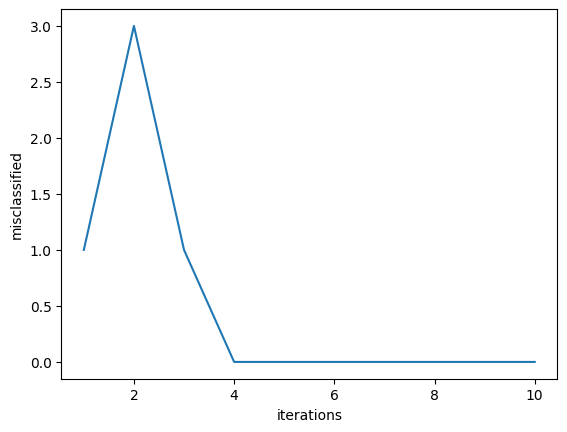

In [48]:
# What happens when the classes in the dataset are not linearly separable? 
# NOTE: the weight vector will be updated infinitely, because the error will never be 0! Not converge.

epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

Below we take as example the existing Iris data to train our perceptron.

### How does the perceptron compare to the Fisher classifier?

Final weights:  [[-11.           7.05969552  -1.14198945]]
No. of misclassified samples per epoch:  [1, 8, 3, 3, 3, 3, 3, 2, 3, 2]


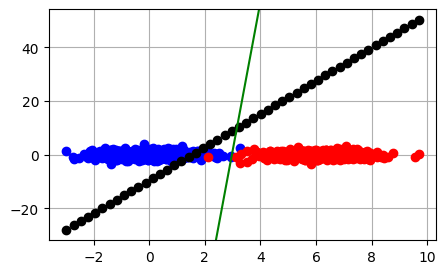

In [11]:
# Train perceptron and Fisher classifier on train set
a = pr.gendats([1000, 1000], 2, 6)
[train_set, test_set] = pr.gendat(a, 0.5) # Split dataset into training and test set
# Turn into numpy matrix with labels as last column to pass to perceptron
train_arr = np.hstack((train_set.data, train_set.nlab()))

# Train perceptron on train set
w, misclassified_ = perceptron(train_arr, num_iter=10)
print('Final weights: ', w)    # [w0, w1, w2]
print('No. of misclassified samples per epoch: ', misclassified_)
plot_decision_boundary(train_set.data, train_set.nlab(), w[0])

# First we scatter data in order to plot the decision boundary obtained by Fisher's linear discriminant
plotc_fisherc = pr.plotc(pr.fisherc(train_set), colors='g', gridsize=100)

# TODO: Compare perceptron and Fisher classifier on large unseen test set